#### Assignment 2
##### Name     - L.H.N. WIJEWARDENA
##### Index No - 190713X

Question 1

In [2]:
import cv2 as cv
import numpy as np
from scipy import optimize
from scipy import linalg
import random
import matplotlib.pyplot as plt

x =  0.30814109855869526
y =  -0.029440900243590785
r =  10.209114718164042
Center of RANSAC = (0.1452932992827618, -0.040007868780651885)
Radius of RANSAC = 9.814578442267795
Ratio of inliers = 100.0 %


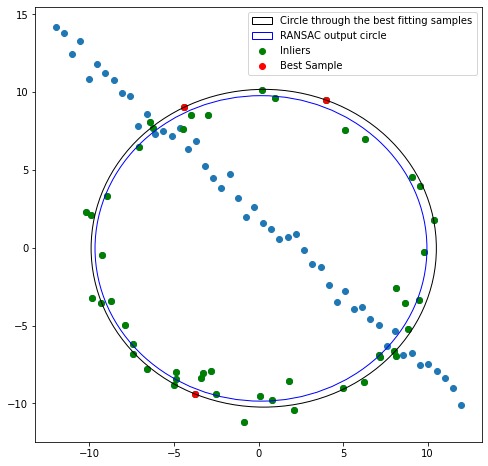

In [65]:
N = 100

half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n)
n = s*np.random.randn (half_n)

x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
X_circ = np.hstack ((x.reshape(half_n , 1) , y.reshape(half_n , 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack (( x.reshape (half_n , 1) , y.reshape(half_n , 1)))

X = np.vstack((X_circ , X_line))


def random_sample(list):
    sample_list = []
    rand_nums = random.sample(range(1, len(list)), 3)
    for i in rand_nums:
        sample_list.append((list[i][0], list[i][1]))
    return sample_list

def model(sample):
	
    p1 = sample[0]
    p2 = sample[1]
    p3 = sample[2]

    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])


    # Center of circle
    c_x = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    c_y = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det
    #radius of the circle
    r = np.sqrt((c_x - p1[0])**2 + (c_y - p1[1])**2)
    
    return c_x, c_y, r

def inliers(data, c_x, c_y, r):
    inliers = []
    d = r + r//5

    for i in range(len(data)):
        dis = np.sqrt((data[i][0]-c_x)**2 + (data[i][1]-c_y)**2)
        if dis < d:
            inliers.append(data[i])

    return inliers


max_inliers = []
radius = 0
center_x = 0
center_y = 0

for i in range(0,1000):
    sample_list = random_sample(X_circ)
    c_x, c_y, r = model(sample_list)
   
    inlier_list = inliers(X_circ, c_x, c_y, r)
    if len(inlier_list)>len(max_inliers):
        max_inliers = inlier_list
        radius = r
        center_x = c_x
        center_y = c_y
        samples = sample_list


print("x = " ,center_x)
print("y = " ,center_y)
print("r = " ,radius)

plt.figure(figsize=(8,8))
circle = plt.Circle(( center_x , center_y ), radius, fill=False, label = "Circle through the best fitting samples", color = 'k' )
fig = plt.gcf()
ax = fig.gca() 
ax.add_patch(circle)  
plt.scatter(X[:,0],X[:,1])
inliers = np.array(max_inliers)
plt.scatter(inliers[:,0],inliers[:,1] , c = "g", label="Inliers")
plt.scatter([samples[0][0], samples[1][0], samples[2][0]] , [samples[0][1], samples[1][1], samples[2][1]] , c ="r", label="Best Sample")


#calculate the distance of each points from the center (xc, yc)
def R_dist(x_, y_, xc, yc):
    return np.sqrt((x_-xc)**2 + (y_-yc)**2)

#calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) 
def f_2(c, x_, y_):
    Ri = R_dist(x_, y_, *c)
    return Ri - Ri.mean()

def fitCircle(x_c, y_c, points):
    x_data = points[:,0]
    y_data = points[:,1]
    estimated_c = x_c, y_c
    new_center, ier = optimize.leastsq(f_2, estimated_c, (x_data, y_data))

    xc_2, yc_2 = new_center

    Ri_2 = R_dist(x_data, y_data, *new_center)
    R_2 = Ri_2.mean()
    return (xc_2, yc_2), R_2

r_center, r_radius = fitCircle(center_x, center_y, np.array(max_inliers))
print("Center of RANSAC =", r_center)
print("Radius of RANSAC =", r_radius)
circle = plt.Circle(r_center, r_radius, fill = False, label = "RANSAC output circle", color = 'b')
ax.add_patch(circle)

print("Ratio of inliers =",len(max_inliers)/half_n*100, "%")
ax.legend()


Question 2

In [3]:
# Function to find the points in the image using left mouse click

def click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, " ", y)


In [23]:
#img1 = cv.imread("002.jpg")
img1 = cv.imread("building.jpg")
assert img1 is not None
cv.imshow("Image 1",img1)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

#img2 = cv.imread("Flag_of_the_United_Kingdom.svg.png")
img2 = cv.imread("batman.jpg")
assert img2 is not None
cv.imshow("Image 2",img2)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

99   42
254   91
32   316
277   322


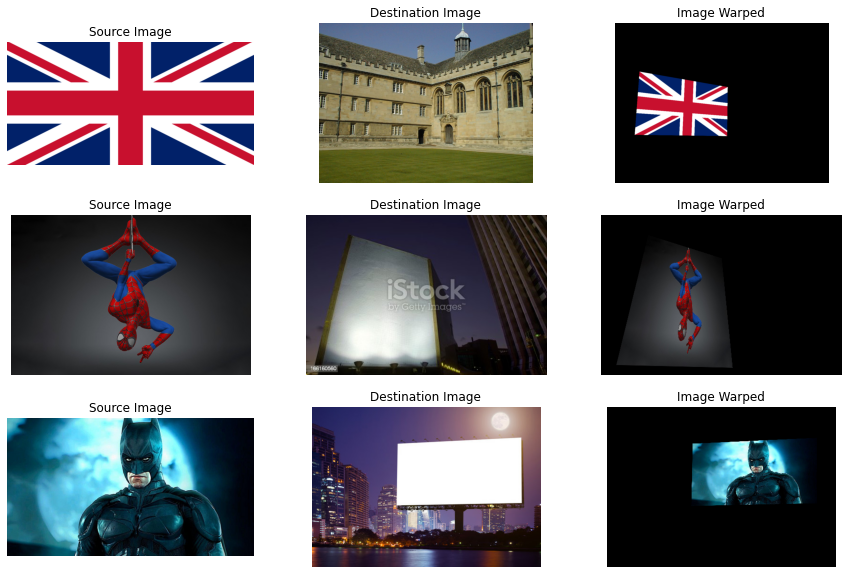

In [6]:

img_dst1 = cv.imread("002.jpg")
img_dst2 = cv.imread("building.jpg")
img_dst3 = cv.imread("banner.jpg")

# Four corners in the destination image
pts_dst1 = np.array([[117, 233], [94, 536], [539, 307],[536, 542]])
pts_dst2 = np.array([[99, 42], [254, 91], [32, 316], [277, 322]])
pts_dst3 = np.array([[192, 82], [470, 69], [189, 222], [470, 216]])

img_src1 = cv.imread("Flag_of_the_United_Kingdom.svg.png")
img_src2 = cv.imread("spider.jpg")
img_src3 = cv.imread("batman.jpg")

# Four corners in the source image.
pts_src1 = np.array([[0, 0], [0, 958], [1919, 0],[1919, 958]])
pts_src2 = np.array([[0, 0], [959, 0], [0, 640], [959, 640]])
pts_src3 = np.array([[0, 0], [1199, 0], [0, 674], [1199, 674]])

# Calculate Homography
h1, status1 = cv.findHomography(pts_src1, pts_dst1)
h2, status2 = cv.findHomography(pts_src2, pts_dst2)
h3, status3 = cv.findHomography(pts_src3, pts_dst3)

# Warp source image to destination based on homography
img_out1 = cv.warpPerspective(img_src1, h1, (img_dst1.shape[1],img_dst1.shape[0]))
img_out2 = cv.warpPerspective(img_src2, h2, (img_dst2.shape[1],img_dst2.shape[0]))
img_out3 = cv.warpPerspective(img_src3, h3, (img_dst3.shape[1],img_dst3.shape[0]))

fig,ax=plt.subplots(3,3,figsize=(15,10))

ax[0][0].imshow(cv.cvtColor(img_src1,cv.COLOR_BGR2RGB))
ax[0][0].set_title("Source Image")
ax[0][0].axis("off")
ax[0][1].imshow(cv.cvtColor(img_dst1,cv.COLOR_BGR2RGB))
ax[0][1].set_title("Destination Image")
ax[0][1].axis("off")
ax[0][2].imshow(cv.cvtColor(img_out1,cv.COLOR_BGR2RGB))
ax[0][2].set_title("Image Warped")
ax[0][2].axis("off")

ax[1][0].imshow(cv.cvtColor(img_src2,cv.COLOR_BGR2RGB))
ax[1][0].set_title("Source Image")
ax[1][0].axis("off")
ax[1][1].imshow(cv.cvtColor(img_dst2,cv.COLOR_BGR2RGB))
ax[1][1].set_title("Destination Image")
ax[1][1].axis("off")
ax[1][2].imshow(cv.cvtColor(img_out2,cv.COLOR_BGR2RGB))
ax[1][2].set_title("Image Warped")
ax[1][2].axis("off")

ax[2][0].imshow(cv.cvtColor(img_src3,cv.COLOR_BGR2RGB))
ax[2][0].set_title("Source Image")
ax[2][0].axis("off")
ax[2][1].imshow(cv.cvtColor(img_dst3,cv.COLOR_BGR2RGB))
ax[2][1].set_title("Destination Image")
ax[2][1].axis("off")
ax[2][2].imshow(cv.cvtColor(img_out3,cv.COLOR_BGR2RGB))
ax[2][2].set_title("Image Warped")
ax[2][2].axis("off")


plt.show()



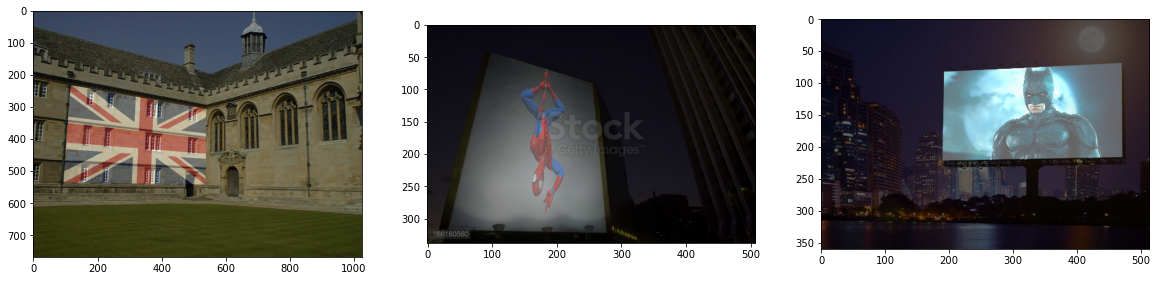

In [28]:
# Blending Images
alpha = 0.65
beta = 1-alpha

blended_1 = cv.addWeighted(img_dst1, alpha, img_out1, beta, 0.0)
blended_2 = cv.addWeighted(img_dst2, 0.4, img_out2, 0.6, 0.0)
blended_3 = cv.addWeighted(img_dst3, 0.4, img_out3, 0.6, 0.0)

fig, ax = plt.subplots(1,3,figsize= (20,20))
ax[0].imshow(cv.cvtColor(blended_1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(blended_2,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(blended_3,cv.COLOR_BGR2RGB))

Question 3

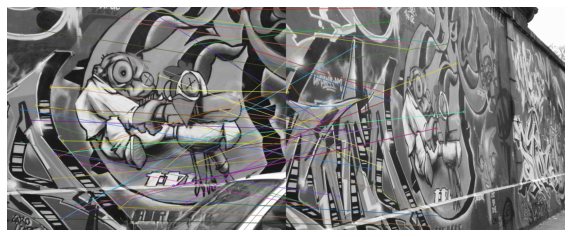

In [53]:
#Match sift features
img11 = cv.imread('img1.ppm')  
img22 = cv.imread('img5.ppm')

img1 = cv.cvtColor(img11,cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img22,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
keypoint_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoint_2, descriptors_2 = sift.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
#sorting to get the best matches
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
matched_img = cv.drawMatches(img1, keypoint_1, img2, keypoint_2, matches[:50], img2, flags = 2)
plt.imshow(cv.cvtColor(matched_img,cv.COLOR_BGR2RGB))
plt.show()

In [4]:
# Function for calculating homography
def calculateHomography(correspondences):
      assemble_list = []
      for points in correspondences:
        p1 = np.matrix([points.item(0), points.item(1), 1])
        p2 = np.matrix([points.item(2), points.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        assemble_list.append(a1)
        assemble_list.append(a2)

      assemble_matrix = np.matrix(assemble_list)
      #svd composition
      u, s, v = np.linalg.svd(assemble_matrix)
      #reshape the min singular value into a 3 by 3 matrix
      h = np.reshape(v[8], (3, 3))
      #normalize 
      h = (1/h.item(8)) * h
      return h

In [5]:
#Calculate the geometric distance between estimated points and original points
def distance(correspondence, h):
    point1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    point2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    #get the value of point2 by the calculated homography matrix
    estimated_point2 = np.dot(h, point1)
    estimated_point2 = (1/estimated_point2.item(2))*estimated_point2
    #Calculate the error between the actual and estimated point
    error = point2 - estimated_point2
    return np.linalg.norm(error)


In [6]:
def ransac(points):
    maxInliers = []
    final_H = None
    for i in range(1000):

        random_points = []
        random_nums = random.sample(range(1, len(points)), 4)
        for i in random_nums:
            random_points.append(points[i])

        #call the homography function 
        h = calculateHomography(random_points)
        inliers = []

        #find the inliers
        for i in range(len(points)):
            d = distance(points[i], h)
            if d < 5:
                inliers.append(points[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            final_H = h
    
    return final_H, maxInliers


In [71]:
correspondenceList = []
keypoints = [keypoint_1,keypoint_2]
  


for match in matches:
    (x1, y1) = keypoints[0][match.queryIdx].pt
    (x2, y2) = keypoints[1][match.trainIdx].pt
    correspondenceList.append([x1, y1, x2, y2])

correspondenceMatrix = np.matrix(correspondenceList)
#run ransac algorithm
finalH, inliers = ransac(correspondenceMatrix)




In [7]:
#alternative method to calculate homography
#calculate from 1-4, then 4-5 and multiply the matrices

img11= cv.imread('img1.ppm')  
img44 = cv.imread('img4.ppm')  
img55= cv.imread('img5.ppm')
#Convert to gray scale and find SIFT features
img1 = cv.cvtColor(img11,cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(img44,cv.COLOR_BGR2GRAY)
img5 = cv.cvtColor(img55,cv.COLOR_BGR2GRAY)


sift = cv.SIFT_create()
keypoint_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoint_4, descriptors_4 = sift.detectAndCompute(img4,None)
keypoint_5, descriptors_5 = sift.detectAndCompute(img5,None)


bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches_1to4 = bf.match(descriptors_1,descriptors_4)
matches_4to5 = bf.match(descriptors_4,descriptors_5)

#sorting to get the best matches
matches_1to4 = sorted(matches_1to4, key = lambda x:x.distance)
matches_4to5 = sorted(matches_4to5, key = lambda x:x.distance)

correspondence_14 = []
keypoints_1to4 = [keypoint_1,keypoint_4]
for i in matches_1to4:
    (x1, y1) = keypoints_1to4[0][i.queryIdx].pt
    (x2, y2) = keypoints_1to4[1][i.trainIdx].pt
    correspondence_14.append([x1, y1, x2, y2])

matCorrespondence_14 = np.matrix(correspondence_14)
H_1to4, inliers14 = ransac(matCorrespondence_14 )

correspondence_45 = []
keypoints_4to5 = [keypoint_4,keypoint_5]
for i in matches_4to5:
    (x1, y1) = keypoints_4to5[0][i.queryIdx].pt
    (x2, y2) = keypoints_4to5[1][i.trainIdx].pt
    correspondence_45.append([x1, y1, x2, y2])

matCorrespondence_45 = np.matrix(correspondence_45)
#run ransac algorithm
H_4to5, inliers45 = ransac(matCorrespondence_45)

H_1to5 =(np.dot(H_4to5,H_1to4))
print(H_1to5)

[[ 5.99771464e-01  5.00007000e-02  2.20079560e+02]
 [ 2.08969564e-01  1.12054791e+00 -1.91141141e+01]
 [ 4.53031988e-04 -5.91794981e-05  9.85370192e-01]]


Text(0.5, 1.0, 'stiched image')

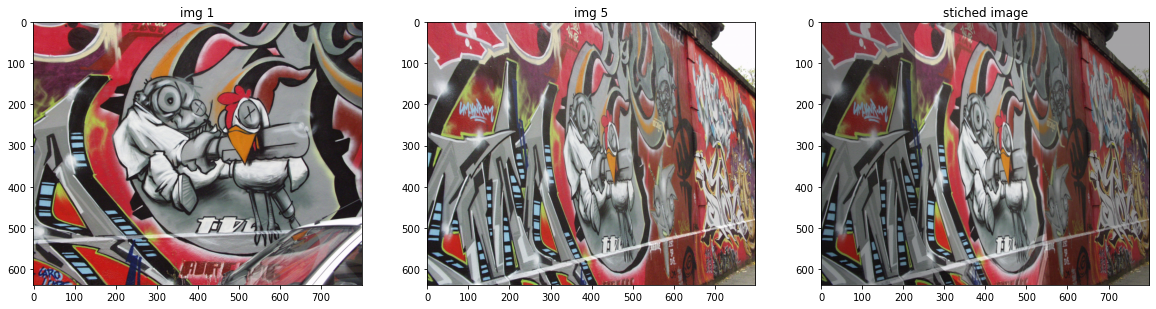

In [14]:
width = img5.shape[1]  
height =img5.shape[0]
result14 = cv.warpPerspective(img11, H_1to4, (width, height))
result45 = cv.warpPerspective(result14, H_4to5, (width, height))

#blending 2 images together
blended = cv.addWeighted(img55, 0.65, result45, 0.35, 0.0)
fig,axes = plt.subplots(1,3,figsize=(20,10))
axes[0].imshow(cv.cvtColor(img11,cv.COLOR_BGR2RGB))
axes[0].set_title("img 1")
axes[1].imshow(cv.cvtColor(img55,cv.COLOR_BGR2RGB))
axes[1].set_title("img 5")
axes[2].imshow(cv.cvtColor(blended,cv.COLOR_BGR2RGB))
axes[2].set_title("stiched image")